In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

### Import CSV Data as panda data frame

In [3]:
df = pd.read_csv('C:/Users/Alicia/Desktop/Self_Development/Python/ML_Projects/MetalManufacturing/src/notebook/data/MetalCoy_Dataset.csv')

In [4]:
df_copy = df.copy()

### Show to 5 records of the dataset

In [5]:
df.head()

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,284.161690,Blade,colGrain,25,4.460592,7.937116,22,0,7,Top,Investment
1,1599.551748,Blade,singleGrain,9,1.425973,2.432948,2,0,0,Bottom,Die
2,768.311031,Nozzle,colGrain,26,2.508879,3.841211,25,0,0,Bottom,Investment
3,1697.663828,Blade,colGrain,12,3.248913,2.610700,10,0,0,Bottom,Continuous
4,1491.478862,Nozzle,colGrain,20,1.901670,4.634926,24,0,0,Top,Die


In [59]:
X = df.drop("Lifespan", axis =1)
y = df["Lifespan"]

In [61]:
#create a list of categorical and non categorical features
categorical_feature = [feature for feature in X.columns if df[feature].dtype == 'O']
numerical_feature = [feature for feature in X.columns if df[feature].dtype != 'O']
for i in categorical_feature :
  #print out the unique values in each categorical columns  
  print("{col} has {vals} unique data values".format(col=i, vals= df[i].unique()))

print("\n")

print("There is {} numerical features: {}".format(len(numerical_feature),numerical_feature))
print("\nThere is {} categorical features: {}".format(len(categorical_feature),categorical_feature))

partType has ['Blade' 'Nozzle' 'Block' 'Valve'] unique data values
microstructure has ['colGrain' 'singleGrain' 'equiGrain'] unique data values
seedLocation has ['Top' 'Bottom'] unique data values
castType has ['Investment' 'Die' 'Continuous'] unique data values


There is 6 numerical features: ['coolingRate', 'quenchTime', 'forgeTime', 'smallDefects', 'largeDefects', 'sliverDefects']

There is 4 categorical features: ['partType', 'microstructure', 'seedLocation', 'castType']


In [62]:
X.loc[df['partType'] == "Blade" , "partType_new"] = 1
X.loc[df['partType'] == "Nozzle" , "partType_new"] = 2
X.loc[df['partType'] == "Block" , "partType_new"] = 3
X.loc[df['partType'] == "Valve" , "partType_new"] = 4

X.loc[df['microstructure'] == "colGrain" , "microstructure_new"] = 1
X.loc[df['microstructure'] == "singleGrain" , "microstructure_new"] = 2
X.loc[df['microstructure'] == "equiGrain" , "microstructure_new"] = 3

X.loc[df['seedLocation'] == "Top" , "seedLocation_new"] = 1
X.loc[df['seedLocation'] == "Bottom" , "seedLocation_new"] = 2

X.loc[df['castType'] == "Investment" , "castType_new"] = 1
X.loc[df['castType'] == "Die" , "castType_new"] = 2
X.loc[df['castType'] == "Continuous" , "castType_new"] = 3

In [63]:
X.drop(categorical_feature, axis=1, inplace=True)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [66]:
rf = RandomForestRegressor(n_estimators= 10)

In [67]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score_error = r2_score(y_test,y_pred)
r2_score_error

0.965532567928479

In [28]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
numerical_tranformer = StandardScaler()
oh_tranformer =  OneHotEncoder()

In [68]:
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_tranformer,categorical_feature ),
        ("StandardScalar", numerical_tranformer,numerical_feature)
    ]
)

In [69]:
df = df_copy.copy()

In [70]:
X = df.drop("Lifespan", axis=1)

In [71]:
y = df["Lifespan"]

In [73]:
X.shape

(1000, 10)

In [74]:
x = preprocessor.fit_transform(X)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [84]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score_error = r2_score(y_test,y_pred)
r2_score_error

0.9696472118686223

In [89]:
model_name = []
model_r2Score = []
model_obj = []
def train_model(name,model,X,y,test_X,test_y):
  #print(X)
  model.fit(X, y)
  ypred = model.predict(test_X)
  r2_score_error = r2_score(test_y,ypred)
  model_name.append(name)
  model_r2Score.append(r2_score_error)
  model_obj.append(model)
  print("{model} : Has R2 Score value of {R2}".format(model=name, R2= r2_score_error))

LinearRegression : Has R2 Score value of 0.7794791432510201
Laso : Has R2 Score value of 0.7789960542117983
RandomForest : Has R2 Score value of 0.9709220863958242
SVR : Has R2 Score value of 0.006972722162225997


Text(0, 0.5, 'R2 Score')

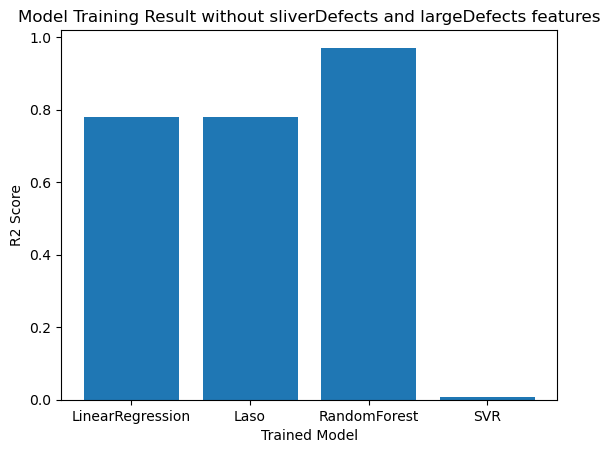

In [90]:
#X = df_type2.drop("Lifespan", axis=1)
#y = df_type2["Lifespan"]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model_r2Score.clear()
model_name.clear()
model_obj.clear()
models = {"LinearRegression": LinearRegression(positive=False, fit_intercept= True),
            "Laso": Lasso(alpha=1.1, selection = "random", max_iter=1500),
            "RandomForest": RandomForestRegressor(n_estimators= 10),
            "SVR": SVR(kernel="poly",degree=3, gamma="auto" )
          }

for i in range(len(list(models.values()))):
  model =  list(models.values())[i]
  m_name = list(models.keys())[i]
  train_model(m_name,model,X_train, y_train,X_test, y_test)

plt.bar(model_name,model_r2Score)
plt.title("Model Training Result without sliverDefects and largeDefects features")
plt.xlabel("Trained Model")
plt.ylabel("R2 Score")